# 1.4.10 Histograms in OpenCV

In [19]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [3]:
img = cv2.imread('./Image/sunset-5163192_960_720.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

In [4]:
cv2.imshow('image',img)
cv2.imshow('hist',hist)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
print(np.transpose(hist))

[[1.0100e+02 1.3400e+02 3.1600e+02 6.6300e+02 1.2140e+03 1.9020e+03
  2.5520e+03 3.4810e+03 4.6760e+03 6.2850e+03 8.1570e+03 9.7490e+03
  1.0748e+04 1.2142e+04 1.3621e+04 1.4655e+04 1.5297e+04 1.5779e+04
  1.6026e+04 1.6203e+04 1.6158e+04 1.6249e+04 1.6220e+04 1.5630e+04
  1.5446e+04 1.4898e+04 1.4112e+04 1.2988e+04 1.2032e+04 1.1141e+04
  1.0433e+04 1.0067e+04 9.6500e+03 9.4000e+03 9.1720e+03 8.5030e+03
  8.0150e+03 7.6860e+03 7.7270e+03 7.6980e+03 7.4010e+03 7.2040e+03
  6.8790e+03 6.2880e+03 6.1530e+03 5.9570e+03 5.8580e+03 5.7500e+03
  5.7390e+03 5.7450e+03 5.6160e+03 5.6460e+03 5.5610e+03 5.5840e+03
  5.5380e+03 5.3620e+03 5.2510e+03 4.9950e+03 5.0320e+03 5.1060e+03
  4.9460e+03 5.0650e+03 5.0070e+03 4.8490e+03 4.7690e+03 4.6860e+03
  4.5500e+03 4.4970e+03 4.1820e+03 4.1450e+03 3.8470e+03 3.8080e+03
  3.7640e+03 3.6820e+03 3.6650e+03 3.4810e+03 3.3980e+03 3.0960e+03
  3.0100e+03 2.9060e+03 2.8350e+03 2.5650e+03 2.5660e+03 2.4090e+03
  2.4590e+03 2.4390e+03 2.4730e+03 2.5930e+03 2.

In [6]:
hist = np.bincount(img.ravel(),minlength=256)

In [7]:
from matplotlib import pyplot as plt

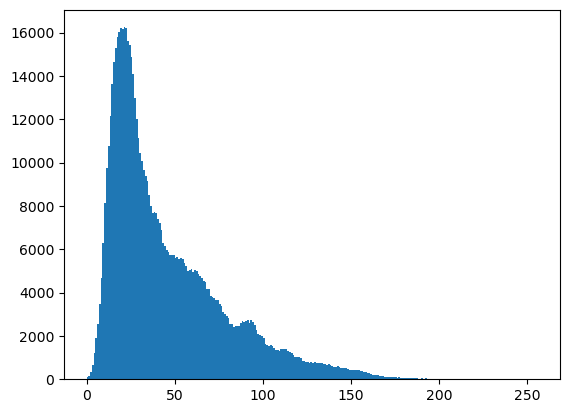

In [8]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

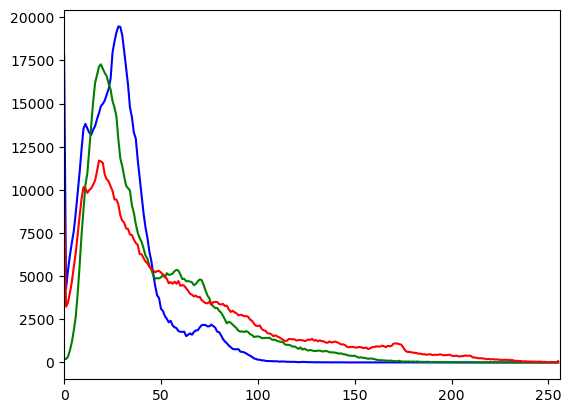

In [9]:
img = cv2.imread('./Image/sunset-5163192_960_720.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

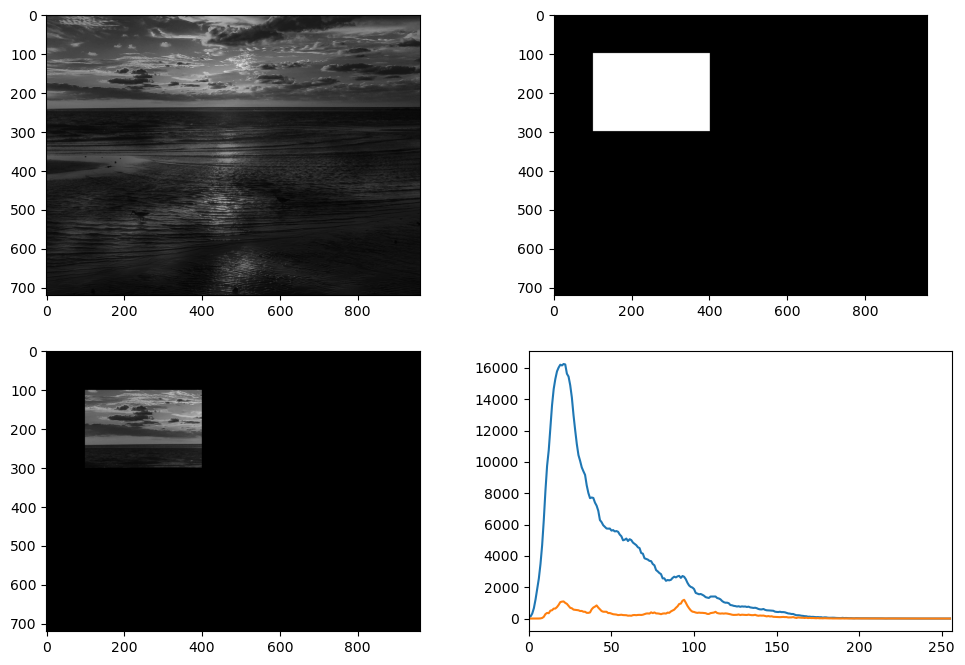

In [11]:
img = cv2.imread('./Image/sunset-5163192_960_720.jpg',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.figure(figsize=(12,8))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

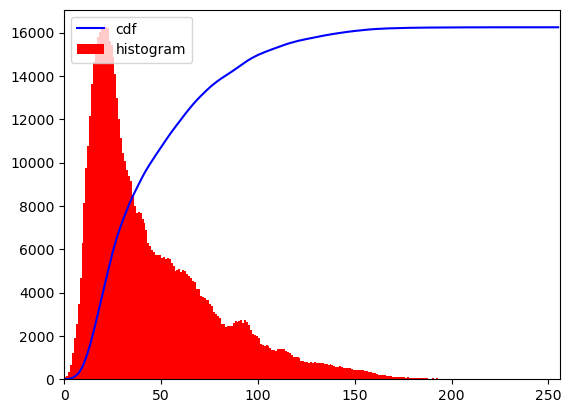

In [12]:
img = cv2.imread('./Image/sunset-5163192_960_720.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [13]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [14]:
img2 = cdf[img]

In [15]:
cv2.imshow('image',img)
cv2.imshow('img2',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

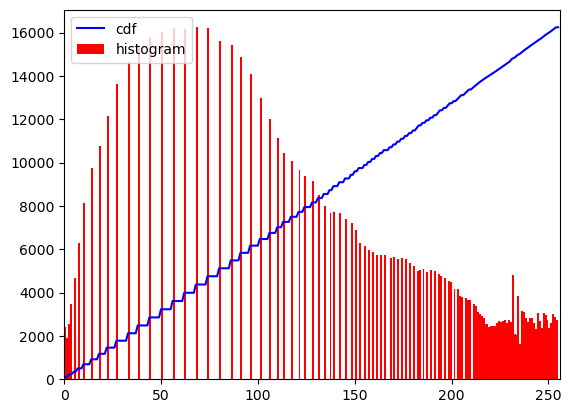

In [16]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [18]:
img = cv2.imread('./Image/sunset-5163192_960_720.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)

True

In [20]:
img = cv2.imread('./Image/sunset-5163192_960_720.jpg',0)
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
cv2.imwrite('clahe_2.jpg',cl1)

True

## https://en.wikipedia.org/wiki/Adaptive_histogram_equalization

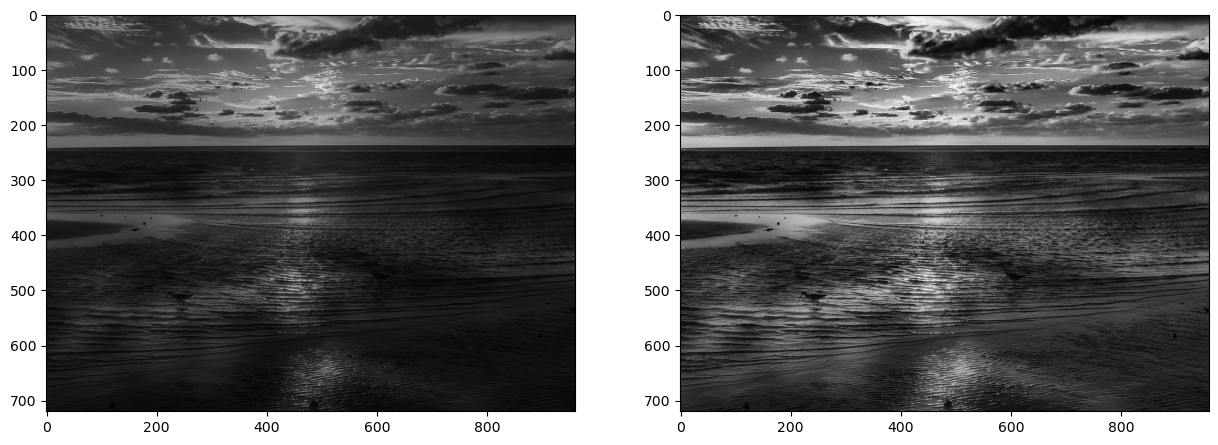

In [21]:
plt.figure(figsize=(15,30))
plt.subplot(1,2,1), plt.imshow(img,'gray')
plt.subplot(1,2,2), plt.imshow(cl1,'gray')
plt.show()

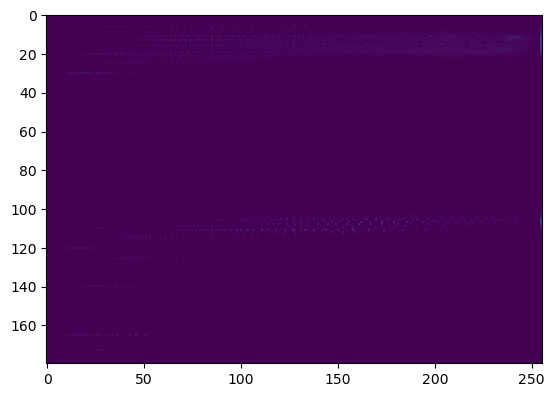

In [24]:
img = cv2.imread('./Image/sunset-5163192_960_720.jpg')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
hist = cv2.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )
plt.imshow(hist,interpolation = 'nearest')
plt.show()